In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
crime=pd.read_csv("C:/Users/hp/Downloads/crime_data.csv")

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
crime.shape

(50, 5)

In [7]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
# Normalized data frame (considering the numerical part of data)
df_norm=pd.DataFrame(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


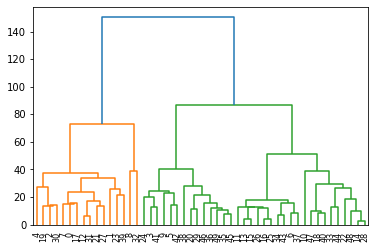

In [9]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='centroid'))

In [10]:
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')

In [11]:
y_hc=hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc,columns=['clusters'])

In [12]:
clusters

,clusters
0,1
1,1
2,1
3,2
4,1
5,2
6,0
7,1
8,3
9,2


In [13]:
df_norm['h_clusterid']=hc.labels_
hc.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [14]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,2


In [15]:
crime['h_clusterid']=hc.labels_

In [16]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2
